In [23]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')
print(myData.shape)

(5110, 12)


In [24]:
peek = myData.head(10)
print(peek)

      id  gender   age  hypertension  heart_disease ever_married      work_type Residence_type  \
0   9046    Male  67.0             0              1          Yes        Private          Urban   
1  51676  Female  61.0             0              0          Yes  Self-employed          Rural   
2  31112    Male  80.0             0              1          Yes        Private          Rural   
3  60182  Female  49.0             0              0          Yes        Private          Urban   
4   1665  Female  79.0             1              0          Yes  Self-employed          Rural   
5  56669    Male  81.0             0              0          Yes        Private          Urban   
6  53882    Male  74.0             1              1          Yes        Private          Rural   
7  10434  Female  69.0             0              0           No        Private          Urban   
8  27419  Female  59.0             0              0          Yes        Private          Rural   
9  60491  Female  78

In [25]:
shape = myData.shape
print(shape)

(5110, 12)


In [26]:
types = myData.dtypes
print(types)

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [27]:
outcome_counts = myData.groupby('stroke').size()
print(outcome_counts)

stroke
0    4861
1     249
dtype: int64


In [28]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy import set_printoptions

label_encoder = LabelEncoder()

categorical_columns = ['gender','ever_married','work_type','Residence_type','smoking_status']

for col in categorical_columns:
    myData[col] = label_encoder.fit_transform(myData[col])

In [29]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

                      id  gender    age  hypertension  heart_disease  ever_married  work_type  \
id                 1.000   0.003  0.004         0.004         -0.001         0.014     -0.016   
gender             0.003   1.000 -0.028         0.021          0.085        -0.031      0.056   
age                0.004  -0.028  1.000         0.276          0.264         0.679     -0.362   
hypertension       0.004   0.021  0.276         1.000          0.108         0.164     -0.052   
heart_disease     -0.001   0.085  0.264         0.108          1.000         0.115     -0.028   
ever_married       0.014  -0.031  0.679         0.164          0.115         1.000     -0.353   
work_type         -0.016   0.056 -0.362        -0.052         -0.028        -0.353      1.000   
Residence_type    -0.001  -0.007  0.014        -0.008          0.003         0.006     -0.007   
avg_glucose_level  0.001   0.055  0.238         0.174          0.162         0.155     -0.051   
bmi                0.003  -0.0

<AxesSubplot:ylabel='Frequency'>

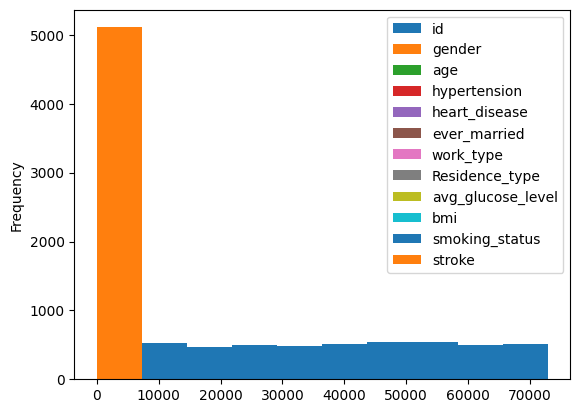

In [30]:
import matplotlib.pyplot as plt
myData.plot.hist()

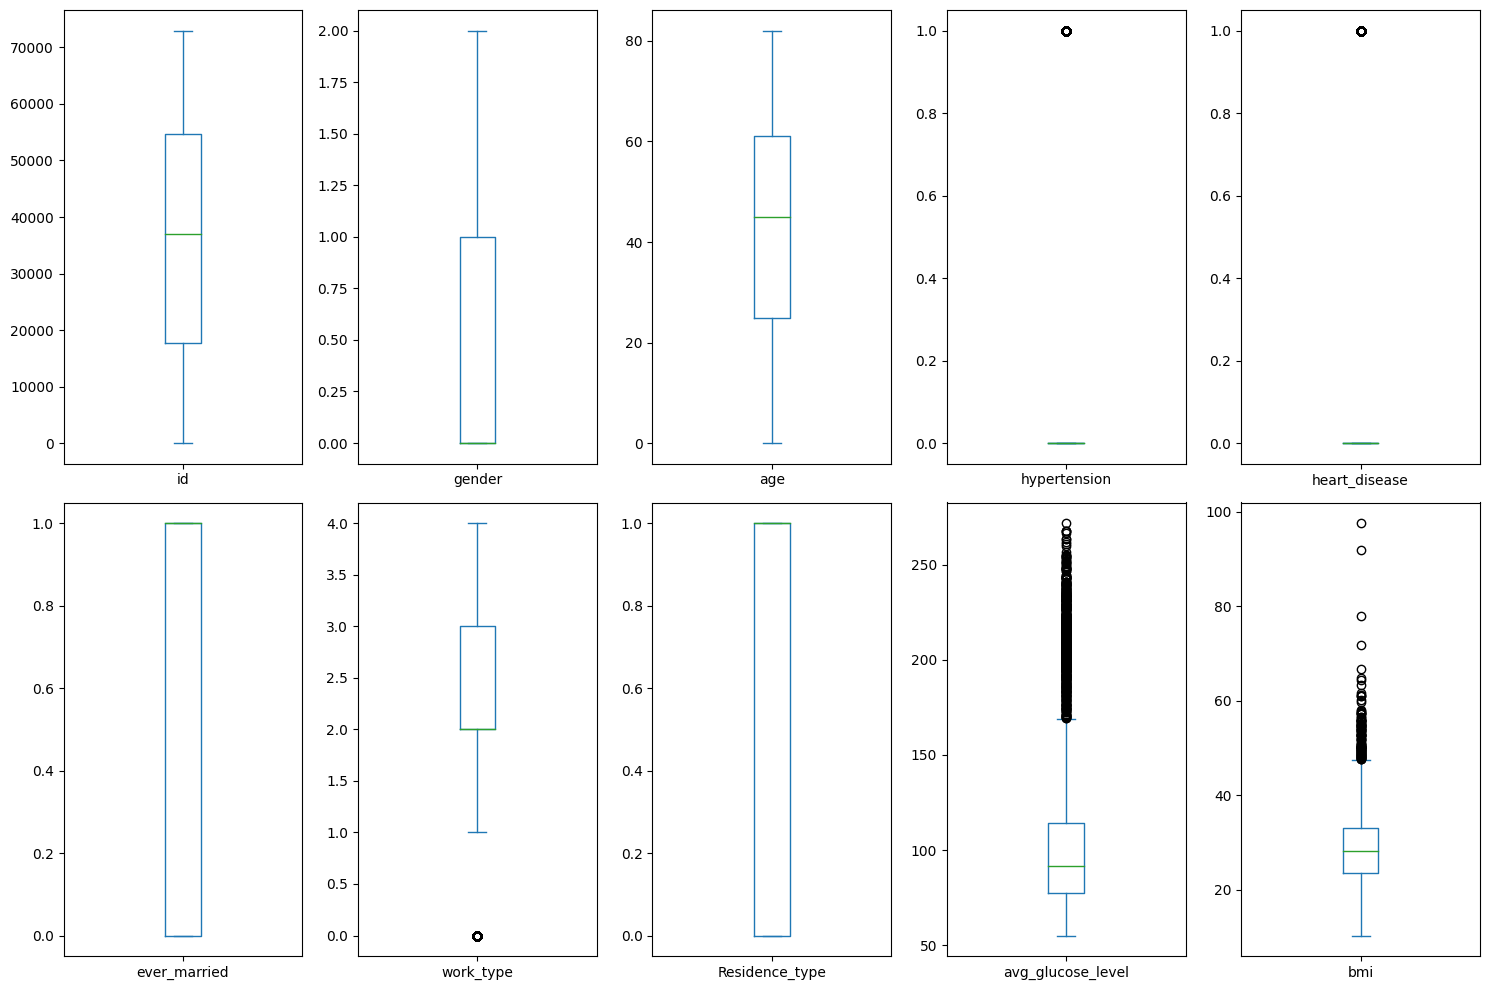

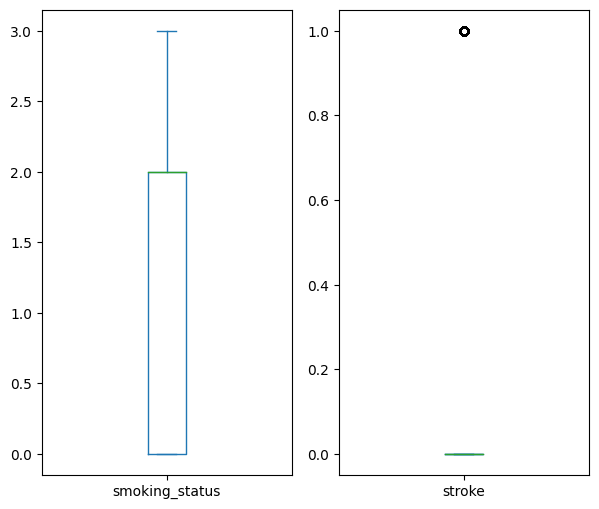

In [32]:
import matplotlib.pyplot as plt
num_columns = len(myData.columns)
cols_per_fig = 10

for i in range(0, num_columns, cols_per_fig):
    myData.iloc[:, i:i+cols_per_fig].plot(
        kind='box', 
        subplots=True, 
        layout=(2, 5),
        figsize=(15, 10),
        sharex=False,
        sharey=False
    )
    plt.tight_layout()
    plt.show()

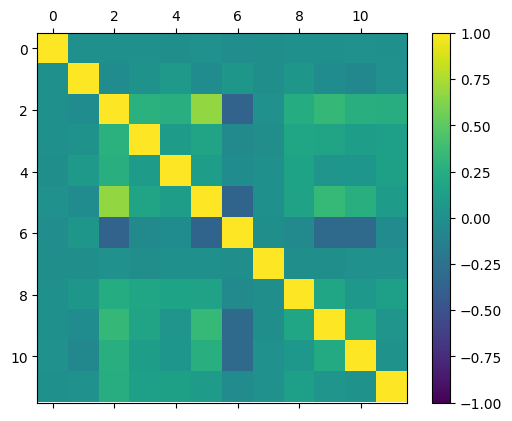

In [33]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [34]:
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from numpy import set_printoptions
# 
# label_encoder = LabelEncoder()
# 
# categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
# 
# for col in categorical_columns:
#     myData[col] = label_encoder.fit_transform(myData[col])

In [35]:
X = myData.drop('stroke', axis=1).values
Y = myData['stroke'].values

mydataScaler = MinMaxScaler(feature_range=(0, 1))
mydataRescaled = mydataScaler.fit_transform(X)

set_printoptions(precision=3)
print(mydataRescaled[20:25, :])

[[0.968 0.    0.866 0.    0.    1.    0.    0.    0.641 0.139 1.   ]
 [0.189 0.    0.634 1.    0.    1.    0.75  1.    0.823 0.442 0.667]
 [0.943 0.    0.963 0.    0.    1.    0.75  1.    0.801 0.187 0.667]
 [0.888 0.5   1.    0.    1.    1.    0.5   0.    0.707 0.254 0.   ]
 [0.057 0.5   0.866 0.    0.    1.    0.5   1.    0.22  0.194 0.333]]


In [36]:
from sklearn.preprocessing import LabelEncoder, Normalizer

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

mydata_train = myData.drop('stroke', axis=1).values
mydata_label = myData['stroke'].values

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)

set_printoptions(precision=3)
print(mydataNormalized[20:25, :])

[[9.995e-01 2.369e-04 1.682e-02 0.000e+00 0.000e+00 2.369e-04 4.738e-04
  2.369e-04 2.437e-02 6.444e-03 2.369e-04]
 [1.000e+00 1.412e-05 1.130e-03 0.000e+00 0.000e+00 1.412e-05 4.236e-05
  0.000e+00 1.470e-03 3.318e-04 2.824e-05]
 [1.000e+00 0.000e+00 1.708e-03 0.000e+00 0.000e+00 2.628e-05 5.257e-05
  0.000e+00 2.654e-03 7.412e-04 2.628e-05]
 [1.000e+00 1.824e-05 1.258e-03 0.000e+00 1.824e-05 1.824e-05 5.472e-05
  1.824e-05 3.561e-03 5.162e-04 5.472e-05]
 [1.000e+00 2.287e-05 1.304e-03 2.287e-05 0.000e+00 2.287e-05 4.575e-05
  2.287e-05 4.851e-03 1.011e-03 6.862e-05]]


In [37]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

[[1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.]]


In [38]:
from sklearn.feature_selection import SelectKBest, f_regression

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

min_value = myData.drop('stroke', axis=1).min().min()
if min_value < 0:
    myData += abs(min_value)

mydata_train = myData.drop('stroke', axis=1).values
mydata_label = myData['stroke'].values

myFeature = SelectKBest(score_func=f_regression, k=4)
fit = myFeature.fit(mydata_train, mydata_label)

set_printoptions(precision=3)
print(fit.scores_)

[1.149e-01 2.241e-01 2.800e+02 1.017e+02 9.518e+01 5.480e+01 5.598e+00
 1.785e-01 9.659e+01 8.826e+00 1.308e+01]


In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)

print("Number of features selected: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

Number of features selected: 4
Selected features are denoted by True: [False False False  True  True  True  True False False False False]
Feature Ranking: [8 4 2 1 1 1 1 3 7 5 6]


In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [1.000e+00 4.567e-06 1.083e-06]
[[-1.000e+00 -1.657e-07 -9.651e-06 -1.578e-08 -4.149e-08 -3.819e-07
   1.178e-06 -1.186e-07 -1.356e-05 -1.154e-06 -9.396e-07]
 [-1.494e-05  5.465e-04  1.564e-01  1.282e-03  8.291e-04  2.160e-03
  -1.951e-03 -7.375e-05  9.870e-01  3.571e-02  2.090e-03]
 [ 7.467e-06  1.122e-03 -9.800e-01 -2.990e-03 -2.102e-03 -1.426e-02
   1.843e-02 -3.095e-04  1.596e-01 -1.159e-01 -1.306e-02]]


In [41]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(4909, 1)


In [42]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(4909, 1)


In [43]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

myData['stroke'] = pd.cut(myData['stroke'], bins=3, labels=[0, 1, 2])
mydata_label = myData['stroke'].values

model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.172 0.035 0.199 0.025 0.022 0.018 0.057 0.041 0.188 0.166 0.079]
